In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.linear_model import LinearRegression
import pickle

In [2]:
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#E76254', '#EF8A47', '#F7AA58', '#FFD06F', '#FFE6B7',
          '#AADCE0', '#72BCD5', '#528FAD', '#376795', '#1E466E'])

In [3]:
# plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#003a7d', '#008dff', '#ff73b6', '#c701ff', '#4ecb8d', '#ff9d3a', '#f9e858', '#d83034'])

In [4]:
with open('true_data.pkl', 'rb') as f:
    profile_list = pickle.load(f)

In [5]:
len(profile_list)

54

In [6]:
def segment_list(input_list, threshold=2):
    segments = []
    curr_segment = [input_list[0]]
    minimum = input_list[0]
    maximum = input_list[0]
    for i in range(1, len(input_list)):
        minimum = min(minimum, input_list[i])
        maximum = max(maximum, input_list[i])
        if abs(input_list[i] - minimum) > threshold or abs(input_list[i] - maximum) > threshold:
            segments.append(curr_segment)
            minimum = input_list[i]
            maximum = input_list[i]
            curr_segment = [input_list[i]]
        else:
            curr_segment.append(input_list[i])
    segments.append(curr_segment)
    return segments

In [7]:
def segment_index_by_threshold(input_list, threshold=2):
    segments = []
    curr_segment = [0]
    minimum = input_list[0]
    maximum = input_list[0]
    for i in range(1, len(input_list)):
        minimum = min(minimum, input_list[i])
        maximum = max(maximum, input_list[i])
        if abs(input_list[i] - minimum) > threshold or abs(input_list[i] - maximum) > threshold:
            segments.append(curr_segment)
            minimum = input_list[i]
            maximum = input_list[i]
            curr_segment = [i]
        else:
            curr_segment.append(i)
    segments.append(curr_segment)
    return segments

In [8]:
segments_list = []

In [9]:
for i in range(200):
    ls = [profile_list[j][i] for j in range(54)]
    segments_list.append(segment_index_by_threshold(ls))

In [10]:
for i in range(len(segments_list)):
    print(len(segments_list[i]))

17
22
22
22
22
22
22
23
23
23
23
23
23
23
24
24
23
23
24
23
23
23
23
24
24
23
23
25
25
24
24
24
24
24
24
24
25
25
25
25
25
25
27
26
26
26
26
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
26
26
26
25
25
25
25
25
25
25
25
25
26
26
26
26
26
26
26
26
25
25
25
25
26
26
27
27
27
27
27
27
27
27
27
27
26
25
25
26
26
26
25
25
26
26
26
26
26
26
26
26
26
26
25
25
25
25
25
25
25
24
24
25
25
25
25
26
26
27
25
25
26
26
26
26
26
26
26
24
24
24
24
24
24
24
24
23
23
23
23
23
24
24
24
24
24
26
26
26
24
24
24
24
24
24
24
24
24
24
24
24
24
24
25
25
25
25
25
25
25
25
25
25
25
25
25
26
26
27
27
27
27
27
27
27
27
27


In [11]:
def convert_to_vector(grouping, length=54):
    vector = np.zeros(length, dtype=int)
    for group_id, group in enumerate(grouping):
        for item in group:
            vector[item] = group_id + 1
    return vector
vectors = np.array([convert_to_vector(result) for result in segments_list])

In [12]:
from sklearn.cluster import KMeans

In [13]:
kmeans = KMeans(n_clusters=1) 
kmeans.fit(vectors)

optimal_vector = kmeans.cluster_centers_[0]
optimal_vector = np.round(optimal_vector).astype(int)

def convert_to_grouping(vector):
    grouping = []
    unique_labels = np.unique(vector)
    for label in unique_labels:
        if label == 0:
            continue
        group = list(np.where(vector == label)[0])
        grouping.append(group)
    return grouping

optimal_classification = convert_to_grouping(optimal_vector)
print("optimal_classification:", optimal_classification)

optimal_classification: [[0], [1, 2], [3, 4, 5, 6], [7, 8], [9, 10, 11, 12], [13, 14], [15, 16, 17], [18], [19, 20, 21, 22], [23, 24, 25], [26], [27, 28, 29, 30, 31], [32], [33, 34], [35], [36], [37, 38], [39], [40], [41, 42], [43, 44], [45, 46, 47, 48], [49], [50, 51], [52, 53]]


In [14]:
len(optimal_classification)

25

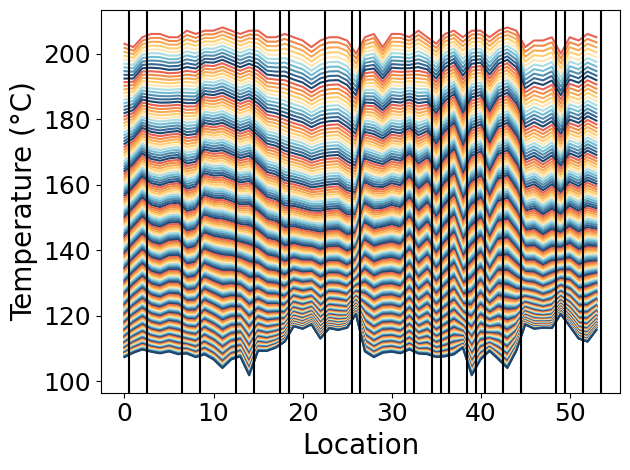

In [15]:
boundaries = [max(group) + 0.5 for group in optimal_classification]
for i in range(200):
    ls = [profile_list[j][i] for j in range(54)]
    plt.plot(ls)

for boundary in boundaries:
    plt.axvline(x=boundary, color='black')

plt.xlabel("Location", fontsize=20)
plt.ylabel("Temperature (°C)", fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.savefig('../paper_plot/partition.png')
plt.show()
